In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/top-youtube-news-media-statistics/Mainstream Media Statistics.csv
/kaggle/input/top-youtube-news-media-statistics/_Top50_viewed_video_from_each_channels.csv


In [2]:
videos_df = pd.read_csv(filepath_or_buffer='../input/top-youtube-news-media-statistics/_Top50_viewed_video_from_each_channels.csv', index_col=[0])
videos_df.head()

,Video Id,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration
1400,spPo80dPUwI,USA TODAY,Heroic mom saves terrified five-year-old from ...,2022-12-05T17:28:31Z,25,A mother came to her five-year-old daughter's ...,347180823.0,10370485.0,269937.0,PT41S
1900,NxRGRFKBVLg,On Demand News,Fans Catch CAT Plummeting from Stadium,2021-09-13T15:02:56Z,25,'Fans Catch CAT Plummeting from Stadium'\n\nFa...,121244026.0,6269691.0,95053.0,PT44S
1401,KDo8n_7_2YI,USA TODAY,Brave woman fights off male attacker while alo...,2023-02-17T13:28:54Z,25,A 24-year-old woman successfully fought off a ...,112886052.0,4248640.0,92533.0,PT37S
1402,_Gtm2j2gb6w,USA TODAY,"Hurricane Fiona devastates Puerto Rico, intens...",2022-09-22T17:29:38Z,25,Hurricane Fiona flooded Puerto Rico with 6 to ...,97966113.0,1504843.0,7100.0,PT42S
650,or_MDJnmihc,CBS News,Defendant collapses in court after guilty verdict,2017-11-14T17:36:13Z,25,Diana Lovejoy collapsed in a California courtr...,75970739.0,371733.0,79515.0,PT2M31S


<Axes: ylabel='categoryId'>

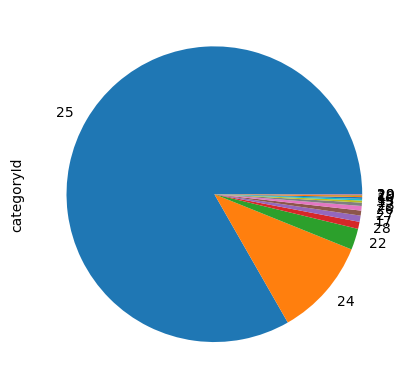

In [3]:
videos_df['categoryId'].value_counts().plot(kind='pie')

In [4]:
df = pd.read_csv('../input/top-youtube-news-media-statistics/Mainstream Media Statistics.csv', index_col=[0])
df.head()

,channelName,id,subscribers,total views,total videos,created date,description,playlistId
0,Fox News,UCXIJgqnII2ZOINSWNOGFThA,10500000,14839464315,93767,2006-09-19T01:48:52Z,FOX News Channel (FNC) is a 24-hour all-encomp...,UUXIJgqnII2ZOINSWNOGFThA
1,Al Jazeera English,UCNye-wNBqNL5ZzHSJj3l8Bg,10500000,3343817389,105487,2006-11-23T14:12:43Z,"#AlJazeeraEnglish, we focus on people and even...",UUNye-wNBqNL5ZzHSJj3l8Bg
2,Vox,UCLXo7UDZvByw2ixzpQCufnA,11400000,3260217205,1593,2014-03-04T20:30:22Z,Vox helps you understand our world.\n\nVox vid...,UULXo7UDZvByw2ixzpQCufnA
3,Good Morning Britain,UCq18eeL7D9Vd8DhjMcLh9QQ,1200000,1048952422,11212,2014-08-18T09:23:49Z,The Good Morning Britain YouTube channel deliv...,UUq18eeL7D9Vd8DhjMcLh9QQ
4,E! News,UCjDsbbzHgTrGc4Ff26TJtsA,1220000,515416062,12501,2005-10-25T11:21:48Z,E! News is your go-to source for breaking cele...,UUjDsbbzHgTrGc4Ff26TJtsA


In [5]:
df.shape

(43, 8)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


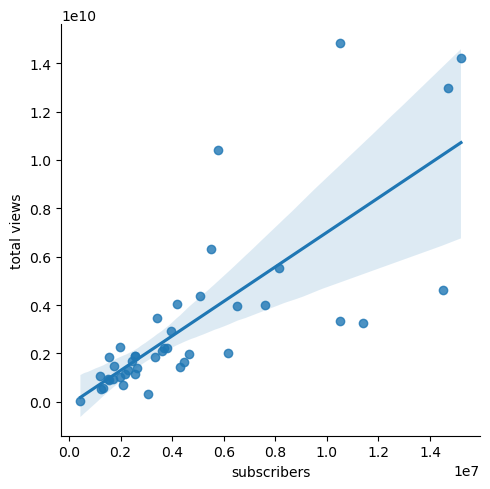

In [6]:
from seaborn import lmplot
lmplot(data=df, x='subscribers', y='total views')

<Axes: xlabel='viewCount', ylabel='likeCount'>

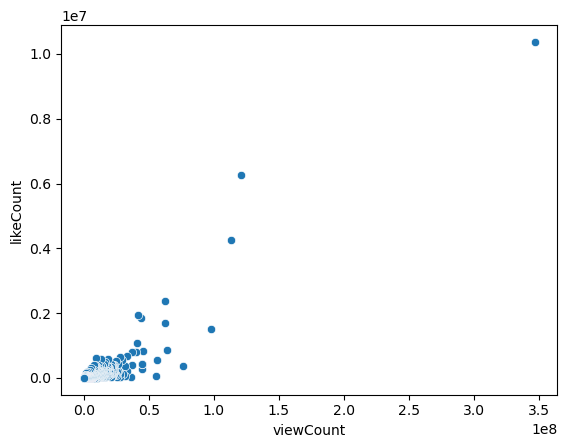

In [7]:
from seaborn import scatterplot
scatterplot(data=videos_df, x='viewCount', y='likeCount')

In [8]:
# what's that outlier?
videos_df.sort_values(by='likeCount', ascending=False).head(n=2)

,Video Id,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration
1400,spPo80dPUwI,USA TODAY,Heroic mom saves terrified five-year-old from ...,2022-12-05T17:28:31Z,25,A mother came to her five-year-old daughter's ...,347180823.0,10370485.0,269937.0,PT41S
1900,NxRGRFKBVLg,On Demand News,Fans Catch CAT Plummeting from Stadium,2021-09-13T15:02:56Z,25,'Fans Catch CAT Plummeting from Stadium'\n\nFa...,121244026.0,6269691.0,95053.0,PT44S


<Axes: xlabel='viewCount', ylabel='commentCount'>

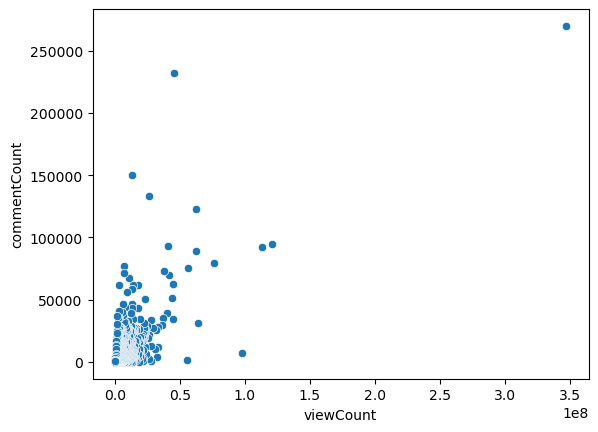

In [9]:
scatterplot(data=videos_df, x='viewCount', y='commentCount')

In [10]:
# what are those comment outliers?
videos_df.sort_values(by='commentCount', ascending=False).head(n=2)

,Video Id,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration
1400,spPo80dPUwI,USA TODAY,Heroic mom saves terrified five-year-old from ...,2022-12-05T17:28:31Z,25,A mother came to her five-year-old daughter's ...,347180823.0,10370485.0,269937.0,PT41S
1451,aMcjxSThD54,Channel 4 News,"Jordan Peterson debate on the gender pay gap, ...",2018-01-16T17:13:07Z,25,"Channel 4 News’ full, fiery interview with cli...",45279588.0,834498.0,232517.0,PT29M56S


<Axes: >

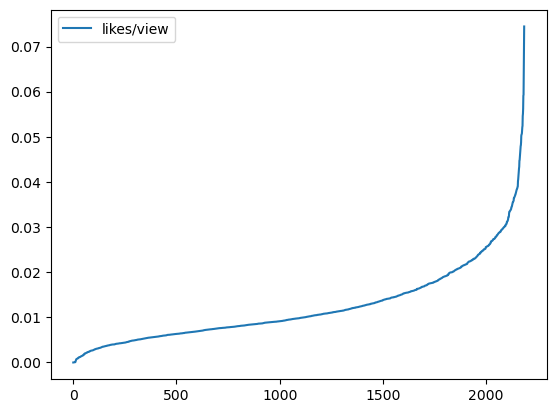

In [11]:
videos_df['likes/view'] = videos_df['likeCount'] / videos_df['viewCount']
videos_df.sort_values(by='likes/view').reset_index().plot(kind='line', y='likes/view')

In [12]:
# what are those like/view outliers?
videos_df.sort_values(ascending=False, by='likes/view').head(n=2)

,Video Id,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration,likes/view
1440,iV-QdPdq85c,USA TODAY,Labor doesn't stop this mom-to-be from receivi...,2023-05-15T18:50:58Z,25,A student was in labor during her college grad...,1942046.0,144575.0,914.0,PT40S,0.074445
1517,ZhJ-LAQ6e_Y,Washington Post,BTS' Speech at the United Nations (Full Speech...,2018-09-24T20:47:15Z,25,BTS (방탄소년단) became the first K-pop group to sp...,2507374.0,172971.0,8083.0,PT6M58S,0.068985


<Axes: >

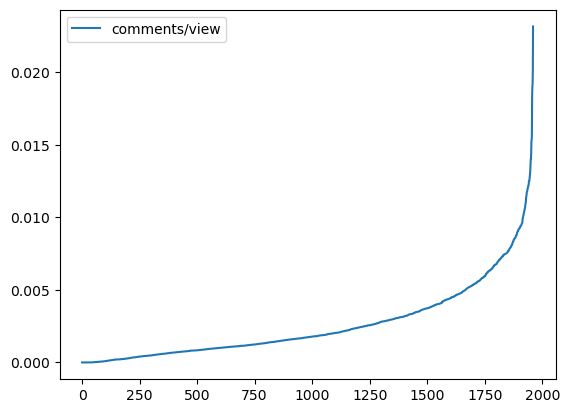

In [13]:
videos_df['comments/view'] = videos_df['commentCount'] / videos_df['viewCount']
videos_df.sort_values(by='comments/view').reset_index().plot(kind='line', y='comments/view')

In [14]:
# what are those comment/view outliers?
videos_df.sort_values(ascending=False, by='comments/view').head(n=2)

,Video Id,channelTitle,title,publishedAt,categoryId,description,viewCount,likeCount,commentCount,duration,likes/view,comments/view
1581,cg7FXmMPhAQ,NowThis News,Animal Rights Activist Regan Russell Killed at...,2020-12-11T21:59:53Z,25,Activist Regan Russell was killed while trying...,1592729.0,27877.0,36901.0,PT15M58S,0.017503,0.023168
1306,V_KKuy5A9CA,euronews,Russian police break up Gay Pride protest in S...,2018-08-04T17:16:49Z,25,Russian police detained as many as 30 gay righ...,3054570.0,122807.0,61435.0,PT1M3S,0.040204,0.020112
